# Challenge

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

- Creating new features
- Applying more overfitting-prevention strategies like subsampling
- More iterations
- Trying a different loss function
- Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications


[0,0]  454 [0,1] 51 (True: 0, Pred: 1)

[1,0]  151 (True: 1, Pred: 0) [1,1] 159  


Training set accuracy: 
Percent Type I errors: 0.046
Percent Type II errors: 0.17

Test set accuracy: 0.75
Percent Type I errors: 0.062
Percent Type II errors: 0.18

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [54]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our binary to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
X.year = df.year - 6
X.gndr = df.gndr - 1

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Split on X_scaled
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [21]:
y_train.value_counts()

0.0    4508
1.0    2824
Name: partner, dtype: int64

In [22]:
y_test.value_counts()

0.0    505
1.0    310
Name: partner, dtype: int64

In [20]:
X.sclmeet.unique()

array([ 5.,  3.,  6.,  7.,  2.,  4.,  1.])

In [49]:
from sklearn import model_selection

# Gridsearch to find optimal values of some of the hyperparameters in boosting model
params = {'n_estimators': [10, 100, 500, 1000],
          'max_depth': [2, 4, 6], 
          'loss': ['deviance', 'exponential']}
# Initialize the model
clf = ensemble.GradientBoostingClassifier()
grid = model_selection.GridSearchCV(clf, params)

#Fit on train datase
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
table_pd = pd.DataFrame(pd.crosstab(y_test, y_pred, margins=True))
table_pd.head()

col_0,0.0,1.0,All
partner,,,
0.0,1169,77,1246
1.0,422,369,791
All,1591,446,2037


In [52]:
print("Accuracy: ", (table_pd.iloc[0,0]+table_pd.iloc[1,1])/((table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])))

# Getting errors
test_tI_errors = table_pd.iloc[0,1]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
test_tII_errors = table_pd.iloc[1,0]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])

print((
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}').format(test_tI_errors, test_tII_errors))

grid.best_estimator_

Accuracy:  0.755031909671


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

So not a particularly large gain.

In [53]:
# Tweaking Gridsearch some more
# Remove max depth option and keep loss function as deviance
# Add learning rate into gridsearch
params = {'n_estimators': [10, 100, 500, 1000],
          'max_depth': [2, 4],
         'learning_rate': [0.05, 0.1, 0.2]}

# Initialize the model
clf = ensemble.GradientBoostingClassifier()
grid = model_selection.GridSearchCV(clf, params)

#Fit on train datase
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
table_pd = pd.DataFrame(pd.crosstab(y_test, y_pred))
print(table_pd)
print("Accuracy: ",
      (table_pd.iloc[0,0]+table_pd.iloc[1,1])/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1]))

# Getting errors
test_tI_errors = table_pd.iloc[0,1]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
test_tII_errors = table_pd.iloc[1,0]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])

print((
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}').format(test_tI_errors, test_tII_errors))

grid.best_estimator_

Accuracy:  0.757977417771
Test set accuracy:
Percent Type I errors: 0.03829160530191458
Percent Type II errors: 0.2037309769268532


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

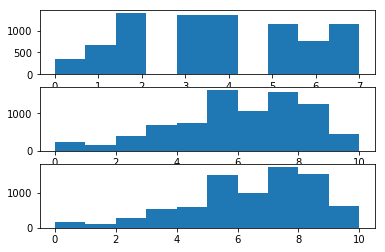

In [33]:
plt.subplot(3,1,1)
plt.hist(X.tvtot)
plt.subplot(3,1,2)
plt.hist(X.ppltrst)
plt.subplot(3,1,3)
plt.hist(X.pplfair)
plt.show()

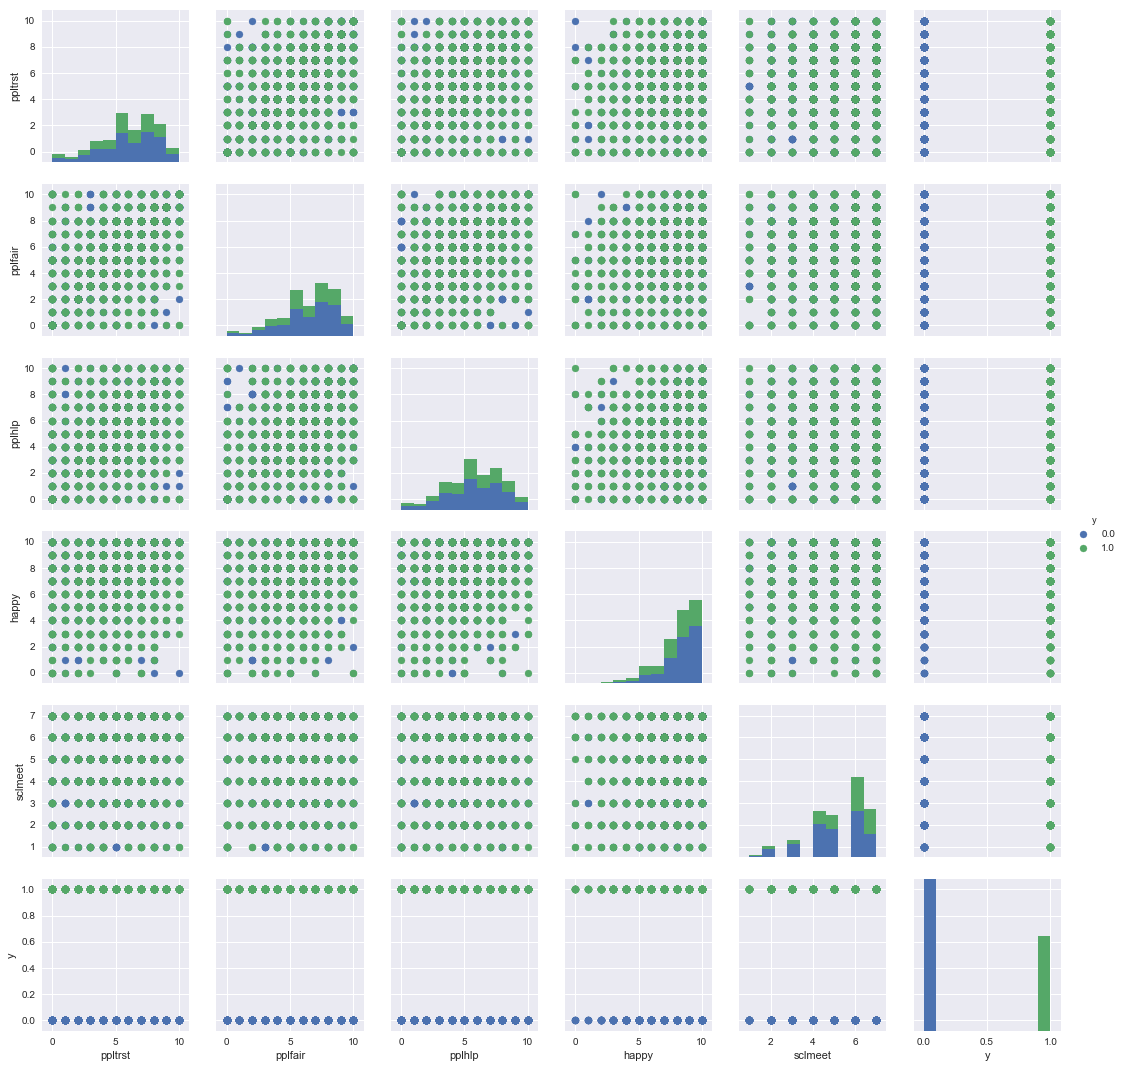

In [40]:
g = sns.PairGrid(X_y.loc[:, ['ppltrst','pplfair','pplhlp','happy','sclmeet','y']], hue = 'y')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

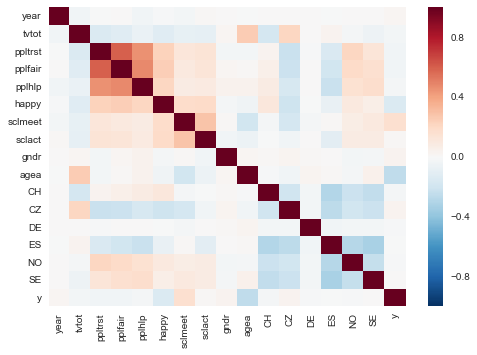

In [41]:
corrs = X_y.corr()
sns.heatmap(corrs)
plt.show()

In [42]:
from sklearn import preprocessing
# Transform data
# Note the assumption of using ordinal data as interval
X_scaled = preprocessing.scale(X, axis=1)

# Split on X_scaled
# Note different split to above
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y)

# Remove max depth option and keep loss function as deviance
# Add learning rate into gridsearch
params = {'n_estimators': [10, 100, 500, 1000],
          'max_depth': [2, 4],
         'learning_rate': [0.05, 0.1, 0.2]}

# Initialize the model
clf = ensemble.GradientBoostingClassifier()
grid = model_selection.GridSearchCV(clf, params)

#Fit on train datase
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
table_pd = pd.DataFrame(pd.crosstab(y_test, y_pred))

print("Accuracy: ",
      (table_pd.iloc[0,0]+table_pd.iloc[1,1])/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1]))
print(grid.best_estimator_)

print(table_pd)

Accuracy:  0.756995581738
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
col_0     0.0  1.0
partner           
0.0      1191  100
1.0       395  351


In [45]:
# Getting errors
test_tI_errors = table_pd.iloc[0,1]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])
test_tII_errors = table_pd.iloc[1,0]/(table_pd.iloc[0,0]+table_pd.iloc[1,1]+
                                               table_pd.iloc[1,0]+table_pd.iloc[0,1])

print((
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}').format(test_tI_errors, test_tII_errors))


Test set accuracy:
Percent Type I errors: 0.049091801669121256
Percent Type II errors: 0.19391261659302897


In [47]:
y_test.value_counts()[0]/y_test.value_counts().sum()

0.63377515954835539